In [125]:
import pymupdf
import os
import re
import matplotlib.pyplot as plt

In [126]:
lic_quimica = pymupdf.open("389701.pdf")
ing_quimica = pymupdf.open("339701.pdf")
industrial = pymupdf.open("309801.pdf")

In [127]:
def sacarPaginas(doc):
    texto = ""
    for page in doc:
        texto += page.get_text()
    return texto
        

In [128]:
text_lic_quimica = sacarPaginas(lic_quimica)
text_ing_quimica = sacarPaginas(ing_quimica)
text_industrial = sacarPaginas(industrial)


In [129]:
def sacar_lista_pos(texto):
    patron = r'[A-Z]\s\d{7}'
    incidencias = 0
    listaPos = []
    for match in re.finditer(patron, texto):
        pos = match.start()
        listaPos.append(pos)
        incidencias = incidencias+1
    return listaPos, incidencias
    

In [130]:
def eliminar_metadatos(texto):
    # antiguo 
    # patron = r'\bProcesado CPD.*?A\w*\s\d/\d{4}'
    # listaPos = []
    # for match in re.finditer(patron , texto, re.S):
    #     listaPos.append((match.start(), match.end()))
    
    # for tupla in reversed(listaPos):
    #     ini , fin = tupla
    #     texto = texto[:ini] + texto[fin:]
    # return texto
    patron = re.compile(r'\bProcesado CPD.*?A\w*\s\d/\d{4}', flags=re.DOTALL)
    cabeceras = re.compile(r'\bNIVEL.*?AULA', flags=re.DOTALL)
    return cabeceras.sub('',patron.sub('', texto))

In [131]:
text_lic_quimica = eliminar_metadatos(text_lic_quimica)
text_ing_quimica = eliminar_metadatos(text_ing_quimica)
text_industrial = eliminar_metadatos(text_industrial)

In [132]:
def graficar_lista(lista, indice, titulo, etiqueta_x="Índice", etiqueta_y="Valor"):
    indices = range(indice)
    
    plt.figure(figsize=(8, 5)) 
    plt.plot(indices, lista, marker='o', linestyle='-', color='b', label="Valores")
    
    plt.title(titulo, fontsize=14)  
    plt.xlabel(etiqueta_x, fontsize=12)  
    plt.ylabel(etiqueta_y, fontsize=12)  
    plt.grid(True)  
    plt.xticks(indices)  
    plt.legend()  

    plt.tight_layout()  
    plt.show()


In [133]:
lista_ing_quimica, ind_ing_quimica = sacar_lista_pos(text_ing_quimica)
lista_lic_quimica, ind_lic_quimica = sacar_lista_pos(text_lic_quimica)
lista_industrial, ind_industrial = sacar_lista_pos(text_industrial)

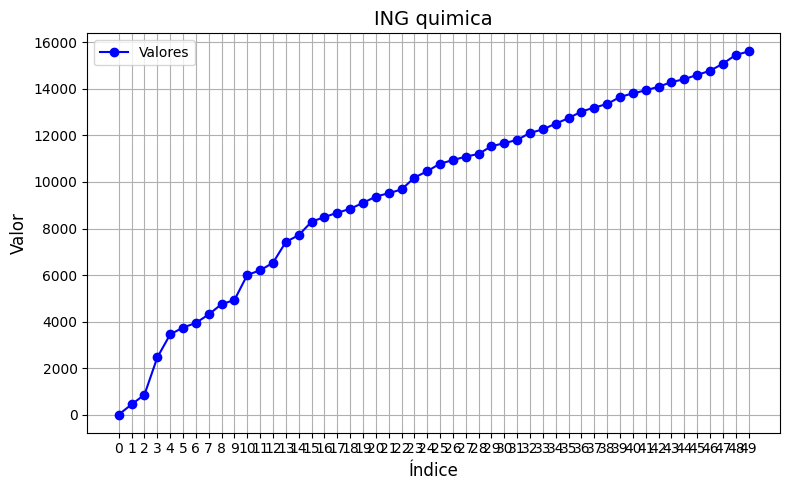

In [134]:
graficar_lista(lista_ing_quimica, ind_ing_quimica, "ING quimica")

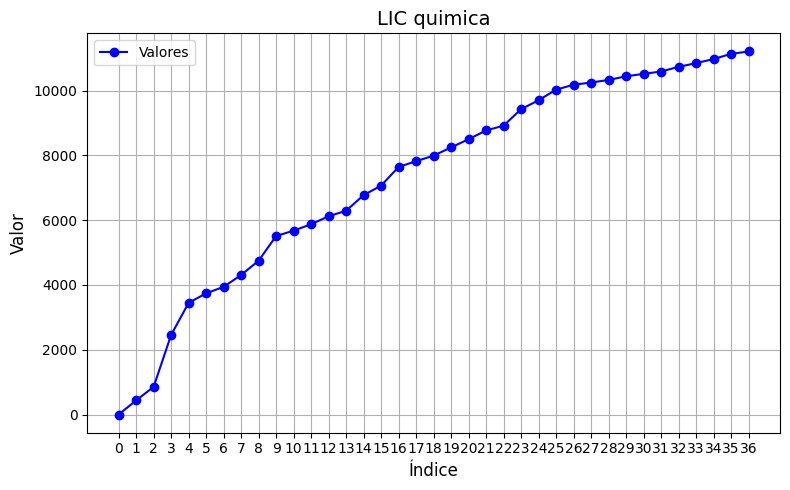

In [135]:
graficar_lista(lista_lic_quimica, ind_lic_quimica, "LIC quimica")

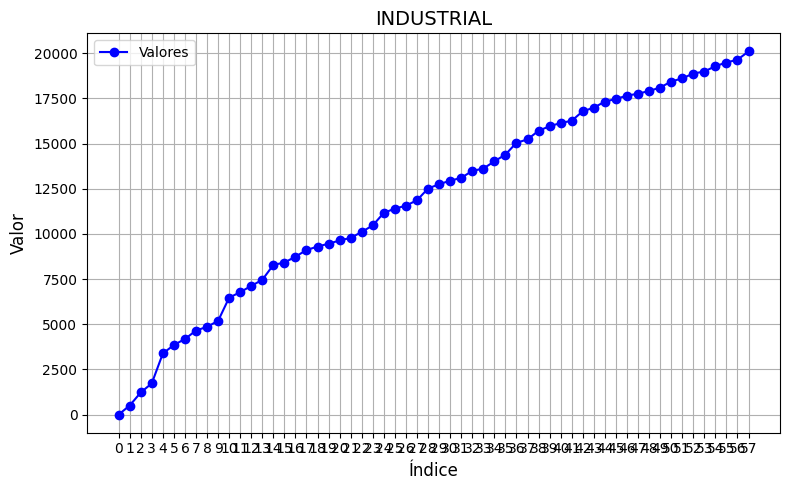

In [136]:
graficar_lista(lista_industrial, ind_industrial, "INDUSTRIAL")

In [137]:
print(text_industrial.strip())

A
2008019 ALGEBRA I
3
OMONTE OJALVO JOSE GIL
LU
1715-1845
693B
3
OMONTE OJALVO JOSE GIL
MA
945 -1115
623
3
OMONTE OJALVO JOSE GIL
JU
945 -1115
612
3A
VARGAS PEREDO EMIR FELIX
LU
1415-1545
617C
3A
VARGAS PEREDO EMIR FELIX
MI
1415-1545
692A
4
PATINO TITO RONALD EDGAR
LU
1845-2015
690E
4
PATINO TITO RONALD EDGAR
MI
1845-2015
692E
4
[TP] TICLLA MAMANI IVAN
VI
1415-1545
624
4A
LEON ROMERO GUALBERTO
LU
1245-1415
692E
4A
LEON ROMERO GUALBERTO
MA
1115-1245
693D
4A
LEON ROMERO GUALBERTO
JU
645 -0815
692F
A
2008054 CALCULO I
21
POR DESIGNAR DOCENTE
LU
815 -0945
691A
21
POR DESIGNAR DOCENTE
MI
815 -0945
642
21
[TP] IBARRA VAQUILLA OSMAR
SA
945 -1115
651
5
FLORES GARCIA HERNAN
JU
815 -0945
612
5
FLORES GARCIA HERNAN
VI
1115-1245
617B
5
[TP] FLORES COCA DENNIS
SA
815 -0945
617C
5A
DELGADILLO COSSIO DAVID ALFREDO
MA
1245-1415
617
5A
DELGADILLO COSSIO DAVID ALFREDO
MI
1245-1415
607
5A
DELGADILLO COSSIO DAVID ALFREDO
VI
1115-1245
692F
6
OMONTE OJALVO JOSE GIL
MA
1115-1245
692A
6
OMONTE OJALVO JOSE GIL